In [25]:
import matplotlib.pyplot as plt
from numpy import *
from numpy.linalg import *
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# %matplotlib widget
%matplotlib inline

In [26]:
svec = loadtxt("../Data/2x2-6p-p1/normal.cell")
rvec = svec/2
b = 4*pi/(linalg.norm(rvec[0])*sqrt(3))
qvec = b*array([[-sqrt(3)/2,-1/2,0],[0,1,0],[sqrt(3)/2,-1/2,0]])/2
qdif = array([[qvec[0]-qvec[1],qvec[1]-qvec[2],qvec[2]-qvec[0]]])
qdif= qdif[0]
qunit = qvec/abs(linalg.norm(qvec[0]))


In [27]:
n_data = loadtxt("../Data/2x2-6p-p1/n.pos")
m_data = loadtxt("../Data/2x2-6p-p1/m.pos")


n_atom = dot(n_data,svec)
n_atom = n_atom-n_atom[0]
m_atom = dot(m_data,svec)
m_atom += average(n_atom[:4]-m_atom[:4],axis=0)
u = around(m_atom - n_atom,8)

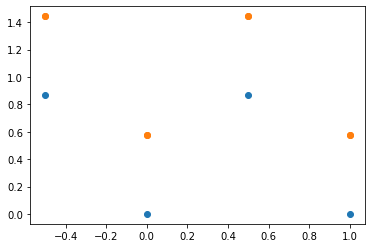

In [22]:
plt.scatter(n_atom[:4].T[0]/norm(rvec[0]),n_atom[:4].T[1]/norm(rvec[0]))
plt.scatter(n_atom[4:].T[0]/norm(rvec[0]),n_atom[4:].T[1]/norm(rvec[0]))

In [28]:
def plot_lattice():
    fig = plt.figure(figsize=(10,10))
    s1, s2 = 200,300
    hw=0.2
    
    cell_color="black"
    cell_lw=5
    cell_zorder=0
    
    plt.scatter(n_atom[0][0],n_atom[0][1],c="blue",s=s2,label="Nb")
    plt.scatter(n_atom[4][0],n_atom[4][1],c="green",s=s1,label="Se")
    period = arange(-2,3,1)
    for i in period:
        for j in period:
    #         print(i,j)
            plt.scatter(n_atom[:4].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[:4].T[1]+(i*svec[0][1]+j*svec[1][1]),c="blue",s=s2,zorder=2)
            plt.scatter(n_atom[4:].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[4:].T[1]+(i*svec[0][1]+j*svec[1][1]),c="green",s=s1,zorder=2)
     
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]+svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[svec[1][1],svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[-svec[1][1],-svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],-svec[0][0]],[svec[1][1],-svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([-svec[0][0],svec[1][0]],[svec[0][1],-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
 


            for k in range(1,12):
                plt.arrow(n_atom.T[0][k]+(i*svec[0][0]+j*svec[1][0]),n_atom.T[1][k]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="orange",head_width=hw)   
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.xticks([])
    plt.yticks([])
#     plt.axis("equal")
    plt.legend(loc='upper right', borderpad=1,markerscale=1,labelspacing=1,fontsize=12)


#     plt.savefig("3x3_lattice.png")
#     plt.savefig("2x2_phase1.png",bbox_inches='tight')
#     plt.axis("equal")
#     plt.show()

In [29]:
def plot_lattice():
    fig = plt.figure(figsize=(10,10))
    s1, s2 = 200,300
    hw=0.2
    
    cell_color="black"
    cell_lw=5
    cell_zorder=0
    
    plt.scatter(n_atom[0][0],n_atom[0][1],c="blue",s=s2,label="Nb")
    plt.scatter(n_atom[4][0],n_atom[4][1],c="green",s=s1,label="Se")
    period = arange(-2,3,1)
    for i in period:
        for j in period:
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]+svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[svec[1][1],svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
#             plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
#             plt.plot([0,svec[1][0]],[0,-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
#             plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
#             plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[-svec[1][1],-svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
#             plt.plot([svec[1][0],-svec[0][0]],[svec[1][1],-svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
#             plt.plot([-svec[0][0],svec[1][0]],[svec[0][1],-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            
            plt.scatter(n_atom[:4].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[:4].T[1]+(i*svec[0][1]+j*svec[1][1]),c="blue",s=s2,zorder=2)
            plt.scatter(n_atom[8:].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[8:].T[1]+(i*svec[0][1]+j*svec[1][1]),c="green",s=s1,zorder=2)
    


            for k in range(1,4):
                plt.arrow(n_atom.T[0][k]+(i*svec[0][0]+j*svec[1][0]),n_atom.T[1][k]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="orange",head_width=hw)   
#             for k in range(7,8):
#                 plt.arrow(n_atom.T[0][k]+(i*svec[0][0]+j*svec[1][0]),n_atom.T[1][k]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="orange",head_width=hw)   
#     plt.colorbar()
    plt.xlim(-10,10)
    plt.ylim(-5,15)
    plt.xticks([])
    plt.yticks([])
#     plt.title("Upper Se Plane")
#     plt.axis("equal")
    plt.legend(loc='upper right', borderpad=1,markerscale=1,labelspacing=1,fontsize=12)


#     plt.savefig("3x3_lattice.png")
    plt.savefig("../Plot/2x2_phase1.png",bbox_inches='tight')
#     plt.axis("equal")
#     plt.show()

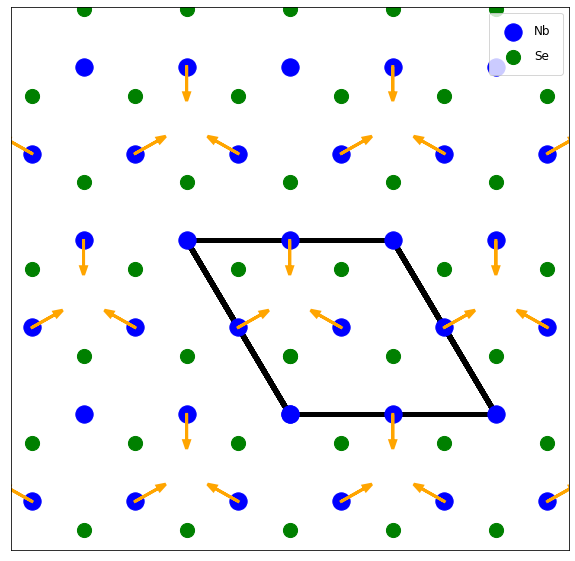

In [30]:
plot_lattice()

In [31]:
u

array([[-0.        ,  0.        ,  0.        ],
       [ 0.08373179,  0.04834257,  0.        ],
       [ 0.        , -0.09668514,  0.        ],
       [-0.08373179,  0.04834257,  0.        ],
       [-0.        , -0.0219685 , -0.00062914],
       [-0.01902528,  0.01098425, -0.00062914],
       [-0.        ,  0.        ,  0.0662878 ],
       [ 0.01902528,  0.01098425, -0.00062914],
       [-0.        , -0.0219685 ,  0.00062914],
       [-0.01902528,  0.01098425,  0.00062914],
       [-0.        ,  0.        , -0.0662878 ],
       [ 0.01902528,  0.01098425,  0.00062914]])

In [32]:
for i in u:
    print(norm(i))

0.0
0.09668514224434384
0.09668514
0.09668514224434384
0.02197750689658861
0.021977507690375174
0.0662878
0.021977507690375174
0.02197750689658861
0.021977507690375174
0.0662878
0.021977507690375174


In [141]:
norm(u[1])/norm(u[6])

1.4585661651818864

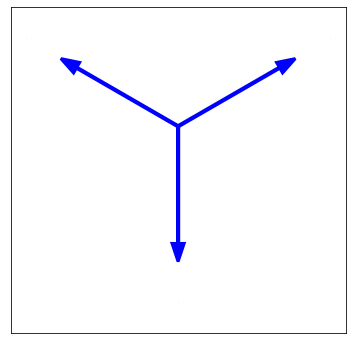

In [55]:
fig = plt.figure(figsize=(6,6))
hw=0.01
plt.scatter(u.T[0]*1.5,u.T[1]*1.5,s=0.001)
plt.plot(0,0,c="blue",label="Nb")
plt.plot(0,0,c="green",label="Se")

for k in range(1,4):
    plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="blue",head_width=hw)   
# for k in [4,5,7,8]:
#     plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="green",head_width=hw)   

plt.xticks([])
plt.yticks([])
plt.axis("equal")
# plt.title("Phase 1 In-Plane Modulation")
# plt.legend()
plt.savefig("../Plot/2x2-p1_nb_mod.png",bbox_inches='tight')
plt.show()


In [39]:
sum(u,axis=0)

array([ 0.00000000e+00,  0.00000000e+00, -2.16840434e-19])

In [88]:
utilde = dot(exp(-1j*dot(n_atom[:4],qvec.T)).T,u[:4])

In [90]:
around(utilde,3)

array([[ 0.167+0.j,  0.097-0.j,  0.   +0.j],
       [ 0.   +0.j, -0.193-0.j,  0.   +0.j],
       [-0.167+0.j,  0.097+0.j,  0.   +0.j]])

In [59]:
around(dot(exp(-1j*dot(n_atom[:4],qvec[0])).T,u[:4]),3)

array([0.167+0.j, 0.097-0.j, 0.   +0.j])

In [60]:
around(dot(exp(-1j*dot(n_atom[:4],qvec[1])).T,u[:4]),3)

array([ 0.   +0.j, -0.193-0.j,  0.   +0.j])

In [62]:
around(u[:4],3)

array([[-0.   ,  0.   ,  0.   ],
       [ 0.084,  0.048,  0.   ],
       [ 0.   , -0.097,  0.   ],
       [-0.084,  0.048,  0.   ]])

In [91]:
around(exp(-1j*dot(n_atom[:4],qvec[0])).T,3)

array([ 1.-0.j,  1.+0.j, -1.+0.j, -1.-0.j])

In [93]:
n_atom[:4]/norm(rvec[0])

array([[ 0.       ,  0.       ,  0.       ],
       [-0.5      ,  0.8660254,  0.       ],
       [ 1.       ,  0.       ,  0.       ],
       [ 0.5      ,  0.8660254,  0.       ]])

In [97]:
u[:4]

array([[-0.        ,  0.        ,  0.        ],
       [ 0.08373179,  0.04834257,  0.        ],
       [ 0.        , -0.09668514,  0.        ],
       [-0.08373179,  0.04834257,  0.        ]])

In [99]:
around(utilde,3)

array([[ 0.167+0.j,  0.097-0.j,  0.   +0.j],
       [ 0.   +0.j, -0.193-0.j,  0.   +0.j],
       [-0.167+0.j,  0.097+0.j,  0.   +0.j]])

In [85]:
around(dot(n_atom[:4],qvec[0]).T,3)

array([ 0.   , -0.   , -3.142, -3.142])

In [86]:
around(exp(-1j*dot(n_atom[:4],qvec[1])).T,3)

array([ 1.-0.j, -1.-0.j,  1.-0.j, -1.-0.j])

In [105]:
around(exp(-1j*dot(n_atom[2],qvec[2])).T,3)

(-1-0j)

In [106]:
n_atom[2]

array([3.69462483, 0.        , 0.        ])

In [104]:
around(exp(-1j*dot(n_atom[:4],qvec[2])).T,3)

array([ 1.-0.j, -1.+0.j, -1.-0.j,  1.-0.j])

In [87]:
around(dot(n_atom[:4],qvec[1]),3)

array([0.   , 3.142, 0.   , 3.142])

In [83]:
-u[:4]

array([[ 0.        , -0.        , -0.        ],
       [-0.08373179, -0.04834257, -0.        ],
       [-0.        ,  0.09668514, -0.        ],
       [ 0.08373179, -0.04834257, -0.        ]])

array([ 1.-0.j,  1.+0.j, -1.+0.j, -1.-0.j])

In [75]:
exp(-1j*pi)

(-1-1.2246467991473532e-16j)

In [76]:
exp(1j*pi)

(-1+1.2246467991473532e-16j)

In [40]:
around(utilde,3)

array([[ 0.167+0.j,  0.097-0.j,  0.   +0.j],
       [ 0.   +0.j, -0.193-0.j,  0.   +0.j],
       [-0.167+0.j,  0.097+0.j,  0.   +0.j]])

In [43]:
qvec[1]

array([0.        , 0.98185848, 0.        ])

In [56]:
sum(exp(-1j*dot(n_atom[:4],qvec[1])))

-4.5707995234595646e-10j

In [49]:
dot(n_atom[:4],qvec[0]),3

(array([ 0.00000000e+00, -4.13730206e-09, -3.14159265e+00, -3.14159266e+00]),
 3)

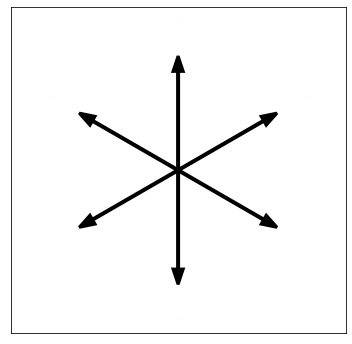

In [34]:
fig = plt.figure(figsize=(6,6))
hw=0.01
plt.scatter(u.T[0]*1.5,u.T[1]*1.5,s=0.001)
plt.scatter(-u.T[0]*1.5,-u.T[1]*1.5,s=0.001)
plt.plot(0,0,c="blue",label="Nb")
plt.plot(0,0,c="green",label="Se")

for k in range(1,4):
    plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="black",head_width=hw)   
    plt.arrow(0,0,-u[k][0],-u[k][1],lw=3,zorder=2,color="black",head_width=hw)   
# for k in [4,5,7,8]:
#     plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="green",head_width=hw)   

plt.xticks([])
plt.yticks([])
plt.axis("equal")
# plt.title("Phase 1 In-Plane Modulation")
# plt.legend()
plt.savefig("../Plot/D6.png",bbox_inches='tight')
plt.show()


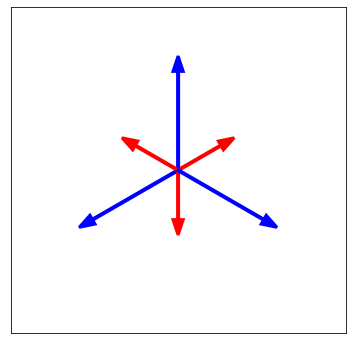

In [60]:
fig = plt.figure(figsize=(6,6))
hw=0.01
plt.scatter(u.T[0]*0*1.5,u.T[1]*1.5,s=0.001)
plt.scatter(-u.T[0]*1.5,-u.T[1]*1.5,s=0.001)
plt.plot(0,0,c="blue",label="Nb")
plt.plot(0,0,c="green",label="Se")

for k in range(1,4):
    plt.arrow(0,0,u[k][0]*0.5,u[k][1]*0.5,lw=3,zorder=2,color="red",head_width=hw)   
    plt.arrow(0,0,-u[k][0],-u[k][1],lw=3,zorder=2,color="blue",head_width=hw)   
# for k in [4,5,7,8]:
#     plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="green",head_width=hw)   

plt.xticks([])
plt.yticks([])
plt.axis("equal")
# plt.title("Phase 1 In-Plane Modulation")
# plt.legend()
plt.savefig("../Plot/D33.png",bbox_inches='tight')
plt.show()


In [35]:
utilde

array([[ 0.16746358+6.92847400e-10j,  0.09668514-8.24928549e-18j,
         0.        +0.00000000e+00j],
       [ 0.        +8.57189395e-28j, -0.19337028-2.20964196e-11j,
         0.        +0.00000000e+00j],
       [-0.16746358+7.31119530e-10j,  0.09668514+1.54317440e-17j,
         0.        +0.00000000e+00j],
       [ 0.16746358-6.92847400e-10j,  0.09668514+8.24928549e-18j,
         0.        +0.00000000e+00j],
       [ 0.        -8.57189395e-28j, -0.19337028+2.20964196e-11j,
         0.        +0.00000000e+00j],
       [-0.16746358-7.31119530e-10j,  0.09668514-1.54317440e-17j,
         0.        +0.00000000e+00j]])

In [68]:
real(utilde)

array([[ 0.16746358,  0.09668514,  0.        ],
       [ 0.        , -0.19337028,  0.        ],
       [-0.16746358,  0.09668514,  0.        ],
       [ 0.16746358,  0.09668514,  0.        ],
       [ 0.        , -0.19337028,  0.        ],
       [-0.16746358,  0.09668514,  0.        ]])

In [63]:
for i in utilde:
    print(norm(i))

0.19337028448868768
0.19337028
0.19337028448868768


In [64]:
for i in utilde:
    print(norm(real(i)))

0.19337028448868768
0.19337028
0.19337028448868768


In [65]:
for i in utilde:
    print(norm(imag(i)))

6.928474036696848e-10
2.2096419591881065e-11
7.311195262527267e-10


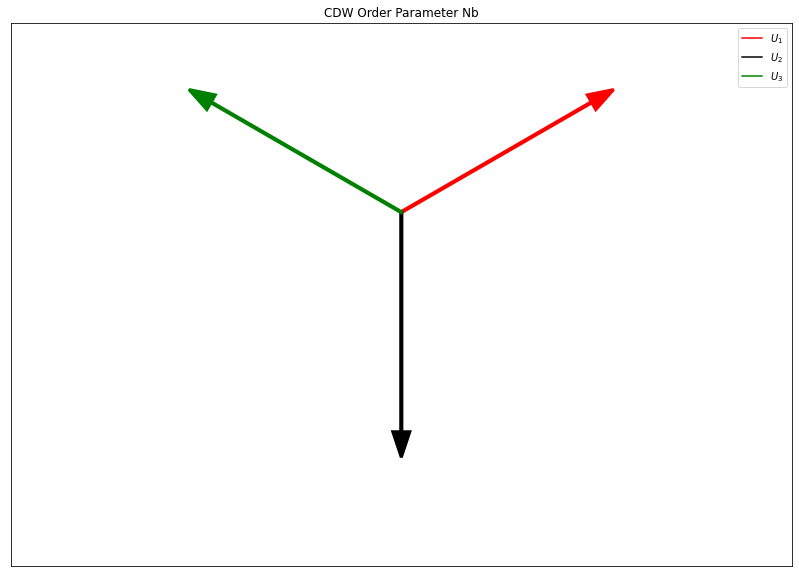

In [133]:
fig = plt.figure(figsize=(14,10))
# for i in qvec:
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="blue")
#     plt.scatter(i[0]*13/10,i[1]*13/10,s=0.0001)
    
colors=["red","black","green"]
    
for i in range(3):
    plt.arrow(0,0,real(utilde)[i][0],real(utilde)[i][1],head_width=0.015,color=colors[i],ls="-",lw=3)
#     plt.arrow(0,0,imag(utilde)[i][0],imag(utilde)[i][1],head_width=0.015,color=colors[i],ls="--",lw=3)
    plt.scatter(real(utilde)[i][0]*15/10,real(utilde)[i][1]*15/10,s=0.0001)
#     plt.scatter(imag(utilde)[i][0]*15/10,imag(utilde)[i][1]*15/10,s=0.0001)
    plt.plot(0,c=colors[i],label=r"$U_{}$".format(i+1))
    
# for i in real(utilde):
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="black")
#     plt.scatter(i[0]*15/10,i[1]*15/10,s=0.0001)
    
# for i in imag(utilde):
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="red")
#     plt.scatter(i[0]*15/10,i[1]*15/10,s=0.0001)


# plt.plot(0,c="black",label="Re(CDW)")
# plt.plot(0,c="red",label="Im(CDW)")
# plt.plot(0,c="blue",label="Q-vec")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.title("CDW Order Parameter Nb")
plt.axis("equal")    
plt.savefig("2x2_phase1_nb.png",bbox_inches='tight')
plt.show()

In [95]:
u

array([[-0.        ,  0.        ,  0.        ],
       [ 0.08373179,  0.04834257,  0.        ],
       [ 0.        , -0.09668514,  0.        ],
       [-0.08373179,  0.04834257,  0.        ],
       [-0.        , -0.0219685 , -0.00062914],
       [-0.01902528,  0.01098425, -0.00062914],
       [-0.        ,  0.        ,  0.0662878 ],
       [ 0.01902528,  0.01098425, -0.00062914],
       [-0.        , -0.0219685 ,  0.00062914],
       [-0.01902528,  0.01098425,  0.00062914],
       [-0.        ,  0.        , -0.0662878 ],
       [ 0.01902528,  0.01098425,  0.00062914]])

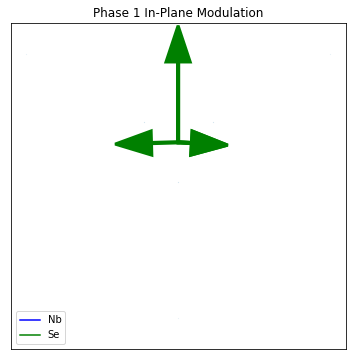

In [56]:
fig = plt.figure(figsize=(6,6))
hw=0.02
plt.scatter(u.T[0]*1.5,u.T[1]*1.5,s=0.001)
plt.plot(0,0,c="blue",label="Nb")
plt.plot(0,0,c="green",label="Se")

# for k in range(1,4):
#     plt.arrow(0,0,u[k][0],u[k][2],lw=3,zorder=2,color="blue",head_width=hw)   
for k in range(4,8):
    plt.arrow(0,0,u[k][1],u[k][2],lw=3,zorder=2,color="green",head_width=hw)   

plt.xticks([])
plt.yticks([])
plt.axis("equal")
plt.title("Phase 1 In-Plane Modulation")
plt.legend()
# plt.savefig("../Plot/2x2-p2_mod.png",bbox_inches='tight')
plt.show()


In [54]:
u

array([[-0.        ,  0.        ,  0.        ],
       [ 0.08373179,  0.04834257,  0.        ],
       [ 0.        , -0.09668514,  0.        ],
       [-0.08373179,  0.04834257,  0.        ],
       [-0.        , -0.0219685 , -0.00062914],
       [-0.01902528,  0.01098425, -0.00062914],
       [-0.        ,  0.        ,  0.0662878 ],
       [ 0.01902528,  0.01098425, -0.00062914],
       [-0.        , -0.0219685 ,  0.00062914],
       [-0.01902528,  0.01098425,  0.00062914],
       [-0.        ,  0.        , -0.0662878 ],
       [ 0.01902528,  0.01098425,  0.00062914]])

In [11]:
for i in u:
    print(norm(i[:2]))

0.0
0.09668514224434384
0.09668514
0.09668514224434384
0.0219685
0.021968500794112007
0.0
0.021968500794112007
0.0219685
0.021968500794112007
0.0
0.021968500794112007


###### u

In [64]:
u[12]

IndexError: index 12 is out of bounds for axis 0 with size 12

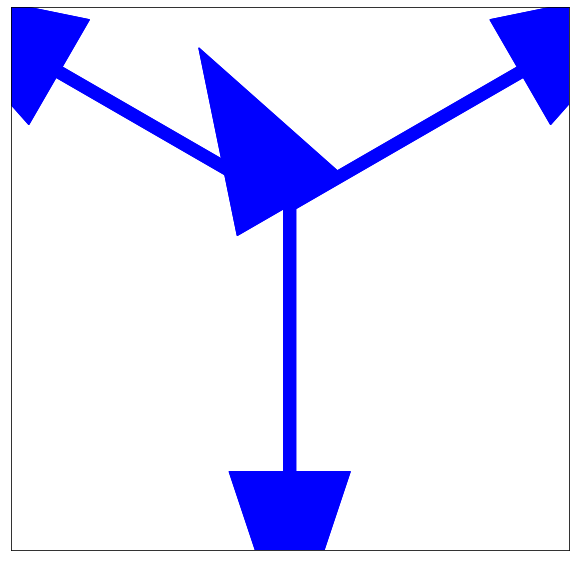

In [66]:
fig = plt.figure(figsize=(10,10))
hw=0.01

for k in range(4,12):
    plt.arrow(0,0,u[k][0],u[k][1],zorder=2,color="blue",head_width=hw,lw=1)   
    plt.scatter([0,u[k][0]*1.1],[0,u[k][1]*1.1],s=0.0001)   

# for k in [2,4]:
#     plt.arrow(0,0,uar[k][0],uar[k][2],lw=3,zorder=2,color="red",head_width=hw)   
# for k in [1,8]:
#     plt.arrow(0,0,uar[k][0],uar[k][2],lw=3,zorder=2,color="black",head_width=hw)   
plt.xticks([])
plt.yticks([])
plt.axis("equal")
# plt.title("Phase 1 Nb Modulation \n XZ Plane")
# plt.savefig("p1_nb_xz.pdf",bbox_inches='tight')
plt.show()
